In [1]:
# kaggel.jsonのアップロード
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zundokokiyoshi","key":"dc6cb7e2961457d1e9404d7fa750672a"}'}

In [2]:
# kaggel.jsonの移動
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [3]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/root/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


上記のセル実行後に表示されるURLをクリックし、コードを貼り付けてEnterを押下する。

In [4]:
!pip install kaggle

パーミッションの変更

In [5]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c dogs-vs-cats

 99% 537M/543M [00:02<00:00, 228MB/s]
100% 543M/543M [00:02<00:00, 229MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 92.0MB/s]
 99% 269M/271M [00:01<00:00, 167MB/s]
100% 271M/271M [00:01<00:00, 156MB/s]


In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [8]:
!unzip 'train.zip'
!unzip 'test1.zip'

Streaming output truncated to the last 5000 lines.
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           
  inflating: test1/5520.jpg          

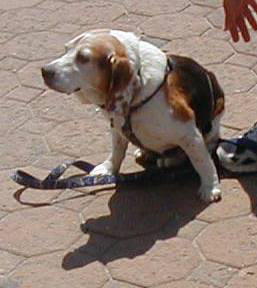

In [9]:
# 解凍されているか確認
from PIL import Image
Image.open('test1/969.jpg')

In [94]:
# google Driveにデータ保存のため、マウントする
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [97]:
!cd /content/drive/My\ Drive/
!pwd

/


#### 訓練用の画像データをnpyファイルに保存

In [105]:
from sklearn.model_selection import train_test_split
import glob
import re
classes = ['cat','dog']
# num_classes = len(classes)


categories = []
filenames = glob.glob('/content/train/*.jpg')
image_size = 50

X_train = []
y_train = []

for _,file in enumerate(filenames):
  image = Image.open(file)
  image = image.convert('RGB')
  image = image.resize((image_size,image_size))
  data = np.asarray(image)
  X_train.append(data)
  category = re.split('[/.]',file)[3]
  # print(category)

  if category == 'dog':
    y_train.append(1)
  else:
    y_train.append(0)

X_train = np.array(X_train)
y_train = np.array(y_train)

# 3:1
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train)
xy = (X_train,X_test, y_train, y_test)
np.save('/content/drive/My Drive/catdog_cnn_train.npy',xy)

KeyboardInterrupt: ignored

In [82]:
# npyデータで作成したファイルをダウンロード
from google.colab import files
files.download('catdog_cnn_train.npy') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データのかさ増しを行った訓練データを保存する。

In [110]:
import glob
import re
classes = ['cat','dog']
# num_classes = len(classes)


categories = []
filenames = glob.glob('/content/train/*.jpg')
image_size = 50

X_train = []
y_train = []

for _,file in enumerate(filenames):
  image = Image.open(file)
  image = image.convert('RGB')
  image = image.resize((image_size,image_size))
  data = np.asarray(image)
  for angle in range(-45,45,15):
    # 回転
    img_r = image.rotate(angle)
    data = np.asarray(img_r)
    X_train.append(data)
    category = re.split('[/.]',file)[3]
    if category == 'dog':
      y_train.append(1)
    else:
      y_train.append(0)
    
    # 反転
    img_trans = img_r.transpose(Image.FLIP_LEFT_RIGHT)
    data = np.asarray(img_trans)
    X_train.append(data)
    if category == 'dog':
      y_train.append(1)
    else:
      y_train.append(0)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_train,X_test,y_train,y_test = train_test_split(X_train,y_train)
xy = (X_train,X_test, y_train, y_test)
np.save('/content/drive/My Drive/catdog_cnn_aug_train.npy',xy)